In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas
from IPython.display import display

In [2]:
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)


for df in [adult_df, compas_df, bank_df, german_df]:
    df["FPR Diff"] = abs(df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"])
    df["FNR Diff"] = abs(df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"])
    df["Accuracy Diff"] = abs(df["Accuracy - Unprivileged"] - df["Accuracy - Privileged"])
    df["FOR Diff"] = abs(df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"])
    df["FDR Diff"] = abs(df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"])
    df["Statistical Parity Diff"] = abs(df["Unprivileged base Rate"] - df["Privileged base Rate"])
    df["F1 Score Diff"] = abs(df["F1 Score - Unprivileged"] - df["F1 Score - Privileged"])
    for metric in df.columns:
        if "Num" in metric or "rivileged" in metric:
            df.drop(metric, axis=1, inplace=True)
    df.set_index = df[df.columns[0]]

In [3]:
df = pandas.concat([adult_df, bank_df, german_df, compas_df])
df = df.abs()
df = df.groupby(df.index).mean()
df.head()

,Accuracy,F1 Score,Theil Index,Consistency,FPR Diff,FNR Diff,Accuracy Diff,FOR Diff,FDR Diff,Statistical Parity Diff,F1 Score Diff
CEOP,0.778617,0.558542,0.144825,0.916858,0.197183,0.346917,0.063383,0.073542,0.153208,0.235717,0.353617
DIR,0.790142,0.681533,0.130058,0.903408,0.063425,0.095142,0.091800,0.095150,0.085658,0.128625,0.100050
DIR + CEOP,0.776742,0.578133,0.137025,0.923800,0.143667,0.328792,0.071875,0.079100,0.131833,0.196708,0.348875
DIR + EGR,0.785208,0.680767,0.131500,0.897950,0.056492,0.104133,0.103867,0.111025,0.115858,0.087208,0.119992
DIR + EGR + CEOP,0.772817,0.575917,0.140692,0.916608,0.065100,0.174050,0.096567,0.096767,0.101833,0.117842,0.208825


In [4]:
def num_interventions(name):
    if "Logistic Regression" in name:
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3
    
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(len(no_int), no_int)
print(len(one_int), one_int)
print(len(two_int), two_int)
print(len(three_int), three_int)

row_ordering = no_int + one_int + two_int + three_int
df = df.loc[row_ordering]

1 ['Logistic Regression']
9 ['OP', 'DIR', 'EOP', 'CEOP', 'ROC', 'GFC', 'PR', 'EGR', 'GSR']
26 ['OP + EOP', 'OP + CEOP', 'OP + ROC', 'OP + GFC', 'OP + PR', 'OP + EGR', 'OP + GSR', 'DIR + EOP', 'DIR + CEOP', 'DIR + ROC', 'DIR + GFC', 'DIR + PR', 'DIR + EGR', 'DIR + GSR', 'GFC + EOP', 'GFC + CEOP', 'GFC + ROC', 'PR + EOP', 'PR + CEOP', 'PR + ROC', 'EGR + EOP', 'EGR + CEOP', 'EGR + ROC', 'GSR + EOP', 'GSR + CEOP', 'GSR + ROC']
24 ['OP + GFC + EOP', 'OP + GFC + CEOP', 'OP + GFC + ROC', 'OP + PR + EOP', 'OP + PR + CEOP', 'OP + PR + ROC', 'OP + EGR + EOP', 'OP + EGR + CEOP', 'OP + EGR + ROC', 'OP + GSR + EOP', 'OP + GSR + CEOP', 'OP + GSR + ROC', 'DIR + GFC + EOP', 'DIR + GFC + CEOP', 'DIR + GFC + ROC', 'DIR + PR + EOP', 'DIR + PR + CEOP', 'DIR + PR + ROC', 'DIR + EGR + EOP', 'DIR + EGR + CEOP', 'DIR + EGR + ROC', 'DIR + GSR + EOP', 'DIR + GSR + CEOP', 'DIR + GSR + ROC']


In [28]:
# save these results to file
# this file contains mean metric score for all interventions
df.to_csv("./results/R4_abs_mean_scores.csv")

In [5]:
df_ranked = {}
for metric in df.columns:
    if "Diff" in metric or "Theil Index" in metric:
        print("metric ascending: ", metric)
        df_ranked[metric] = df[metric].sort_values(ascending=True).index
    elif metric in ["Accuracy", "F1 Score", "Consistency"]:
        print("metric descending: ", metric)
        # accuracy, f1 score descending
        df_ranked[metric] = df[metric].sort_values(ascending=False).index
    else:
        print("Unaccounted metric: ", metric)
df_ranked = pandas.DataFrame(df_ranked)

# add rank column
df_ranked.insert(0, "Rank", range(1,61))
df_ranked

metric descending:  Accuracy
metric descending:  F1 Score
metric ascending:  Theil Index
metric descending:  Consistency
metric ascending:  FPR Diff
metric ascending:  FNR Diff
metric ascending:  Accuracy Diff
metric ascending:  FOR Diff
metric ascending:  FDR Diff
metric ascending:  Statistical Parity Diff
metric ascending:  F1 Score Diff


,Rank,Accuracy,F1 Score,Theil Index,Consistency,FPR Diff,FNR Diff,Accuracy Diff,FOR Diff,FDR Diff,Statistical Parity Diff,F1 Score Diff
0,1,Logistic Regression,DIR + EGR + ROC,DIR + EGR + ROC,OP + GFC + ROC,EGR + EOP,OP + GFC + EOP,DIR + GFC + ROC,OP + PR,Logistic Regression,OP + GFC + EOP,GSR + ROC
1,2,DIR,DIR,DIR,OP + GFC + CEOP,OP + GFC + ROC,GFC + EOP,DIR + GFC,DIR + GFC + CEOP,DIR,OP + EGR + ROC,GFC + EOP
2,3,GSR,DIR + GSR,DIR + EGR,OP + GFC,PR + EOP,OP + EGR + EOP,OP + PR + ROC,CEOP,GSR + CEOP,OP + EGR,GSR
3,4,DIR + EGR + ROC,DIR + EGR,DIR + GSR,OP + GSR,OP + EGR + EOP,OP + EOP,OP + ROC,PR + CEOP,DIR + EGR + CEOP,OP + GSR + EOP,EGR + ROC
4,5,DIR + EGR,Logistic Regression,DIR + PR + EOP,OP,OP + GFC + EOP,OP + GSR + ROC,ROC,DIR + CEOP,GFC + CEOP,OP + GFC + ROC,PR
5,6,DIR + GSR,OP + CEOP,DIR + ROC,OP + EGR + ROC,OP + GFC,OP + GFC + ROC,EOP,PR,GFC,GSR + ROC,DIR + GFC + EOP
6,7,EGR,OP + GSR + CEOP,DIR + CEOP,OP + PR,DIR + GFC,OP + PR + EOP,DIR + GFC + EOP,DIR + PR + CEOP,DIR + GFC,DIR + GFC,EOP
7,8,DIR + PR + CEOP,OP,Logistic Regression,OP + GSR + CEOP,GFC + EOP,DIR + GSR + EOP,OP + GSR + ROC,OP + GFC + ROC,DIR + PR,OP + EOP,GFC + ROC
8,9,CEOP,OP + GSR,DIR + PR + ROC,OP + CEOP,DIR + EOP,GSR + EOP,GFC + CEOP,DIR + GSR + CEOP,DIR + EGR,EGR + ROC,DIR + PR
9,10,PR + CEOP,GSR,DIR + GSR + CEOP,OP + PR + CEOP,DIR + GSR + EOP,OP + GFC,PR + ROC,GFC + CEOP,PR,OP + PR + EOP,Logistic Regression


In [30]:
df_ranked.to_csv("./results/R4_mean_ranked.csv", index=False)

In [6]:
df["F1 Score"].sort_values(ascending=False)[:10]

DIR + EGR + ROC        0.683392
DIR                    0.681533
DIR + GSR              0.681300
DIR + EGR              0.680767
Logistic Regression    0.679983
OP + CEOP              0.669189
OP + GSR + CEOP        0.667800
OP                     0.667689
OP + GSR               0.666300
GSR                    0.663758
Name: F1 Score, dtype: float64

In [7]:
# trimmed version of df_ranked for the paper - top 10 and bottom 10
df_rank_trimmed = pandas.concat([df_ranked.head(10), df_ranked.tail(10)])
df_rank_trimmed

,Rank,Accuracy,F1 Score,Theil Index,Consistency,FPR Diff,FNR Diff,Accuracy Diff,FOR Diff,FDR Diff,Statistical Parity Diff,F1 Score Diff
0,1,Logistic Regression,DIR + EGR + ROC,DIR + EGR + ROC,OP + GFC + ROC,EGR + EOP,OP + GFC + EOP,DIR + GFC + ROC,OP + PR,Logistic Regression,OP + GFC + EOP,GSR + ROC
1,2,DIR,DIR,DIR,OP + GFC + CEOP,OP + GFC + ROC,GFC + EOP,DIR + GFC,DIR + GFC + CEOP,DIR,OP + EGR + ROC,GFC + EOP
2,3,GSR,DIR + GSR,DIR + EGR,OP + GFC,PR + EOP,OP + EGR + EOP,OP + PR + ROC,CEOP,GSR + CEOP,OP + EGR,GSR
3,4,DIR + EGR + ROC,DIR + EGR,DIR + GSR,OP + GSR,OP + EGR + EOP,OP + EOP,OP + ROC,PR + CEOP,DIR + EGR + CEOP,OP + GSR + EOP,EGR + ROC
4,5,DIR + EGR,Logistic Regression,DIR + PR + EOP,OP,OP + GFC + EOP,OP + GSR + ROC,ROC,DIR + CEOP,GFC + CEOP,OP + GFC + ROC,PR
5,6,DIR + GSR,OP + CEOP,DIR + ROC,OP + EGR + ROC,OP + GFC,OP + GFC + ROC,EOP,PR,GFC,GSR + ROC,DIR + GFC + EOP
6,7,EGR,OP + GSR + CEOP,DIR + CEOP,OP + PR,DIR + GFC,OP + PR + EOP,DIR + GFC + EOP,DIR + PR + CEOP,DIR + GFC,DIR + GFC,EOP
7,8,DIR + PR + CEOP,OP,Logistic Regression,OP + GSR + CEOP,GFC + EOP,DIR + GSR + EOP,OP + GSR + ROC,OP + GFC + ROC,DIR + PR,OP + EOP,GFC + ROC
8,9,CEOP,OP + GSR,DIR + PR + ROC,OP + CEOP,DIR + EOP,GSR + EOP,GFC + CEOP,DIR + GSR + CEOP,DIR + EGR,EGR + ROC,DIR + PR
9,10,PR + CEOP,GSR,DIR + GSR + CEOP,OP + PR + CEOP,DIR + GSR + EOP,OP + GFC,PR + ROC,GFC + CEOP,PR,OP + PR + EOP,Logistic Regression


In [36]:
df_rank_trimmed.to_csv("./results/R4_rank_trimmed.csv", index=False)

<h3>Accuracy, F1 score for different number of interventions</h3>

In [8]:
df_int_type = {}
row_names = ["Zero", "One", "Two", "Three"]
for row_name, int_type in zip(row_names, [no_int, one_int, two_int, three_int]):
    df_int_type[row_name] = df.loc[int_type].mean()*100

df_int_type = pandas.DataFrame(df_int_type).T

df_int_type

,Accuracy,F1 Score,Theil Index,Consistency,FPR Diff,FNR Diff,Accuracy Diff,FOR Diff,FDR Diff,Statistical Parity Diff,F1 Score Diff
Zero,79.252500,67.998333,13.950000,89.206667,10.100833,9.474167,8.597500,9.650000,6.457500,16.125000,8.055833
One,75.389846,62.155988,16.383148,90.118117,7.362500,11.903488,7.790062,11.218302,15.187037,10.442562,12.491080
Two,72.127009,58.346368,19.045673,90.991720,5.614060,9.788665,8.539701,12.359274,16.811571,8.236613,13.941934
Three,69.731632,58.782986,19.473924,90.883646,5.338229,8.375579,9.284016,13.230035,20.511088,6.377072,15.738634


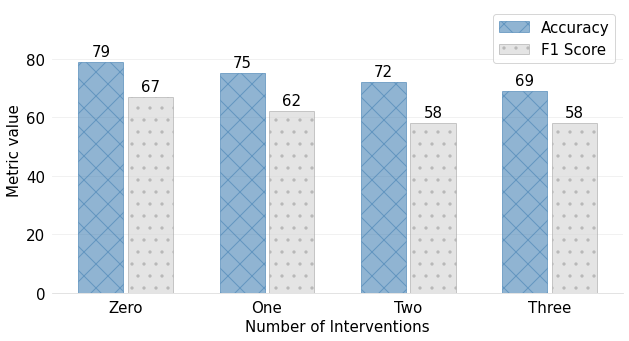

In [16]:
# code: https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/
labels = df_int_type.index
width = 0.35  # the width of the bars
x = np.arange(len(labels))

mean_acc = df_int_type["Accuracy"].astype(int)
mean_f1 = df_int_type["F1 Score"].astype(int)

fig, ax = plt.subplots(figsize=(9, 5))
plt.rcParams.update({'font.size': 15})
rects1 = ax.bar(x - width/2, mean_acc, label='Accuracy', color='steelblue', edgecolor='steelblue', alpha=0.6, width=0.32, hatch='x')
rects2 = ax.bar(x + width/2, mean_f1, label='F1 Score', color='lightgrey', edgecolor='darkgrey', alpha=0.6, width=0.32, hatch='.')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric value', size=15)
ax.set_xlabel('Number of Interventions', size=15)
#ax.set_title('Mean Accuracy and F1 Score by number of Interventions')
ax.set_xticks(x, labels, size=15)
ax.set_ylim([0, 98])
ax.legend(loc=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.show()
fig.savefig('./figures/utility_by_intervention.png', dpi=600)

In [17]:
round(df_int_type["Accuracy"], 2)

Zero     79.25
One      75.39
Two      72.13
Three    69.73
Name: Accuracy, dtype: float64

<h3>EXTRA</h3>

In [3]:
adult_ranking = pandas.DataFrame(data=adult_df.index, columns=['Adult'])
for metric in adult_df.columns:
    if metric in ["Accuracy", "F1 Score"]:
        adult_ranking[metric] = adult_df[metric].rank(ascending=False, method="min").astype(int)
    else:
        adult_ranking[metric] = adult_df[metric].rank(ascending=True, method="min").astype(int)
adult_ranking = adult_ranking.set_index("Adult")
rank_scores = []
for intervention in adult_df["Adult"]:
    rank_scores.append(sum(adult_ranking.loc[intervention]))
adult_ranking["Rank Score"] = rank_scores
adult_ranking.sort_values("Rank Score", inplace=True)
adult_ranking

,Accuracy,Theil Index,Consistency,F1 Score,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff,Rank Score
Adult,,,,,,,,,,,,
RW,1,17,1,2,31,14,36,19,2,1,9,133
RW + ROC,31,2,1,5,14,22,1,24,14,1,28,143
DIR,3,14,1,1,33,13,38,16,1,17,8,145
Logistic Regression,1,17,1,2,31,14,36,19,2,17,9,149
ROC,31,2,1,5,14,22,1,24,14,17,28,159
DIR + ROC,33,1,1,4,16,24,3,23,11,17,30,163
RW + PR + ROC,35,8,1,9,17,20,4,30,17,1,25,167
RW + EGR + ROC,8,22,1,15,19,28,15,41,22,1,4,176
DIR + PR + ROC,34,7,1,8,13,19,6,29,16,17,27,177


In [4]:
compas_ranking = pandas.DataFrame(data=compas_df['Compas'], columns=['Compas'])
for metric in compas_df.columns:
    if metric == "Compas":
        continue
    if metric not in {"Accuracy", "F1 Score", "Consistency", "Theil Index"}:
        compas_ranking[metric] = compas_df[metric].rank(ascending=True, method="min").astype(int)
compas_ranking = compas_ranking.set_index("Compas")
rank_scores = []
for intervention in compas_df["Compas"]:
    rank_scores.append(sum(compas_ranking.loc[intervention]))
compas_ranking["Rank Score"] = rank_scores
compas_ranking.sort_values("Rank Score", inplace=True)
compas_ranking

,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff,Rank Score
Compas,,,,,,,,
RW + PR + ROC,13,11,14,20,37,1,10,106
DIR + EGR + EOP,11,1,11,33,28,17,7,108
DIR + ROC,15,16,6,28,23,17,8,113
RW + EGR + EOP,1,10,31,22,30,1,19,114
RW + GSR + EOP,3,2,37,34,39,1,2,118
RW + PR + EOP,2,8,29,29,31,1,18,118
DIR + EOP,12,14,9,39,26,17,4,121
PR + ROC,13,11,14,20,37,17,10,122
RW + EGR,24,19,17,24,24,1,13,122


In [5]:
german_ranking = pandas.DataFrame(data=german_df['German'], columns=['German'])
for metric in german_df.columns:
    if metric == "German":
        continue
    if metric not in {"Accuracy", "F1 Score", "Consistency", "Theil Index"}:
        german_ranking[metric] = german_df[metric].rank(ascending=True, method="min").astype(int)
german_ranking = german_ranking.set_index("German")
rank_scores = []
for intervention in german_df["German"]:
    rank_scores.append(sum(german_ranking.loc[intervention]))
german_ranking["Rank Score"] = rank_scores
german_ranking.sort_values("Rank Score", inplace=True)
german_ranking

,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff,Rank Score
German,,,,,,,,
RW + GSR + EOP,2,1,2,19,23,1,12,60
RW + EOP,9,4,4,24,14,1,4,60
RW + PR + EOP,8,9,17,23,8,1,1,67
GSR + EOP,6,3,3,22,17,17,6,74
EOP,9,4,4,24,14,17,4,76
RW + EGR + EOP,4,7,13,20,21,1,15,81
DIR + EOP,11,6,7,27,11,17,2,81
PR + EOP,5,10,1,18,28,17,16,95
RW + EGR + CEOP,1,21,10,37,18,1,8,96


In [6]:
bank_ranking = pandas.DataFrame(data=bank_df['Bank'], columns=['Bank'])
for metric in bank_df.columns:
    if metric == "Bank":
        continue
    if metric not in {"Accuracy", "F1 Score", "Consistency", "Theil Index"}:
        bank_ranking[metric] = bank_df[metric].rank(ascending=True, method="min").astype(int)
bank_ranking = bank_ranking.set_index("Bank")
rank_scores = []
for intervention in bank_df["Bank"]:
    rank_scores.append(sum(bank_ranking.loc[intervention]))
bank_ranking["Rank Score"] = rank_scores
bank_ranking.sort_values("Rank Score", inplace=True)
bank_ranking

,False Positive Rate Diff,False Negative Rate Diff,Accuracy Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,F1 Score Diff,Rank Score
Bank,,,,,,,,
RW + PR + EOP,3,3,13,20,32,1,25,97
RW + GSR + EOP,9,1,27,25,22,1,16,101
RW + EGR + EOP,10,13,30,28,18,1,10,110
PR + EOP,3,3,13,20,32,17,25,113
RW + EOP,24,15,5,12,37,1,29,123
RW + PR + ROC,21,6,44,44,8,1,1,125
RW + PR,43,10,36,22,3,1,11,126
GSR + EOP,13,5,26,24,27,17,19,131
RW + GSR + CEOP,29,43,8,5,5,1,43,134
